In [1]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Preprocesamiento
from sklearn.preprocessing import StandardScaler

# Modelado GMM
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

# Reducción de dimensionalidad (opcional, para visualización)
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm



In [5]:
df = pd.read_csv('MusicInfo.csv')


features = [
    'duration_ms', 'danceability', 'energy', 'loudness',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo',
    'key', 'mode', 'time_signature'
]



In [6]:
# Revisión inicial
print("Dimensiones:", df.shape)
print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nEstadísticos descriptivos de las variables numéricas:")
print(df[features].describe())

Dimensiones: (50683, 21)

Valores nulos por columna:
track_id                   0
name                       0
artist                     0
spotify_preview_url        0
spotify_id                 0
tags                    1127
genre                  28335
year                       0
duration_ms                0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acousticness               0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
dtype: int64

Estadísticos descriptivos de las variables numéricas:
        duration_ms  danceability        energy      loudness   speechiness  \
count  5.068300e+04  50683.000000  50683.000000  50683.000000  50683.000000   
mean   2.511551e+05      0.493537      0.686486     -8.291204      0.076023   
std    1.075860e+05      0.178838

In [7]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df[features])

pd.DataFrame(X_scaled, columns=features).head()

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature
0,-0.269137,-0.774656,0.919413,0.864320,-0.018718,-0.702067,-0.668405,-0.640651,-0.746334,0.830710,-1.208715,0.764615,0.24269
1,0.069321,-0.472704,0.816159,0.861462,-0.558145,-0.703331,-0.668405,-0.045615,0.841907,1.719004,-0.928450,0.764615,0.24269
2,-0.299625,0.080874,0.554052,0.551457,-0.473942,-0.705418,-0.667044,-0.691004,0.424559,-0.118014,-0.367918,-1.307848,0.24269
3,-0.131330,-1.199626,-0.089301,-0.123078,-0.512096,-0.704712,-0.666462,-0.446276,0.219750,-0.639674,1.033410,0.764615,0.24269
4,-0.116328,0.120016,-1.018589,-0.361407,-0.514728,-0.672316,-0.667987,-0.467933,-1.271883,-1.069068,0.472879,0.764615,0.24269


In [10]:
bic, aic = [], []
n_components_range = range(1, 11)

for k in n_components_range:
    gm = GaussianMixture(n_components=k, n_init=10, random_state=42)
    gm.fit(X_scaled)
    bic.append(gm.bic(X_scaled))
    aic.append(gm.aic(X_scaled))

df_bic_aic = pd.DataFrame({
    'n_components': list(n_components_range),
    'BIC': bic,
    'AIC': aic
})

display(df_bic_aic)

,n_components,BIC,AIC
0,1,1.731291e+06,1.730372e+06
1,2,1.086009e+06,1.084162e+06
2,3,1.016067e+06,1.013293e+06
3,4,6.612676e+05,6.575664e+05
4,5,4.608709e+05,4.562423e+05
5,6,3.949112e+05,3.893550e+05
6,7,3.694258e+05,3.629421e+05
7,8,3.471761e+05,3.397649e+05
8,9,3.070650e+05,2.987263e+05
9,10,1.983589e+05,1.890927e+05


In [24]:
from sklearn.mixture import GaussianMixture

# Ajuste final con el k óptimo
k_opt = 7  
gm_final = GaussianMixture(n_components=k_opt, n_init=10, random_state=42)
gm_final.fit(X_scaled)

# Etiquetas y probabilidades
labels = gm_final.predict(X_scaled)
probs  = gm_final.predict_proba(X_scaled)

# Parámetros del modelo
print("Pesos:",       gm_final.weights_)
print("Medias:",      gm_final.means_)
print("Covarianzas:", gm_final.covariances_)


Pesos: [0.36103798 0.05853752 0.02714749 0.02898921 0.32066325 0.00896989
 0.19465466]
Medias: [[-0.10472503  0.30535701 -0.29518873 -0.17175089 -0.08353415  0.28282761
  -0.151669   -0.05371844  0.22968844 -0.10662974 -0.13481215  0.76461498
   0.24269015]
 [-0.11510209 -0.60113634 -1.29887775 -0.99861889 -0.5098603   1.16624442
   0.2412037  -0.41971531 -0.67092581 -0.06716443 -0.08311771  0.0427294
  -1.94602831]
 [ 0.22246739 -0.31734177 -0.48296127 -0.66900147  1.50800945  0.53742056
   0.20241003  0.64049577 -0.28943275 -0.01800348  0.04340208 -0.09078067
  -1.57503924]
 [ 0.03758214 -0.87877562  0.79528657  0.58287788  0.28742199 -0.70107538
   0.23056743  0.13189682 -0.53801539  0.22251681  0.04024857 -0.13032573
  -2.00715414]
 [ 0.04642583  0.1342907   0.11133269  0.09913683  0.016371   -0.1132657
   0.03172657  0.00553882  0.0385026  -0.00855114  0.21900167 -1.30784777
   0.24269015]
 [ 3.34752416 -1.10356227 -1.36787882 -2.28834274 -0.28532796  0.91320985
   1.09516555  0.0

In [32]:
# Ajuste final
gm_final = GaussianMixture(n_components=5, n_init=10, random_state=42)
gm_final.fit(X_scaled)

# Obtener asignaciones y probabilidades
labels = gm_final.predict(X_scaled)
probs  = gm_final.predict_proba(X_scaled)

# Inspeccionar parámetros del modelo
print("Pesos:\n",       gm_final.weights_)
print("Medias:\n",      gm_final.means_)
print("Covarianzas:\n", gm_final.covariances_)


Pesos:
 [0.55707599 0.32312666 0.02421764 0.05814599 0.03743372]
Medias:
 [[-0.07025122  0.05984556  0.07233183  0.0801941  -0.04859105 -0.05925399
  -0.07824712  0.00296356  0.10158709  0.00724913 -0.12217504  0.76461498
   0.24269015]
 [ 0.06202097  0.1249142   0.09951492  0.08146554  0.01401366 -0.10483186
   0.0389735   0.00516894  0.03098577 -0.01298544  0.21860178 -1.30784777
   0.24269015]
 [ 1.36397198 -0.74882162 -0.94755578 -1.15100361 -0.19046123  0.75744051
   0.62520955  0.64575818 -0.65639152 -0.12844489 -0.01344033 -0.10679414
  -1.73025698]
 [-0.1059702  -0.61002198 -1.20415113 -0.9651747  -0.50957212  1.07369354
   0.26398359 -0.49203733 -0.66437456 -0.04837129 -0.07043208  0.03062957
  -1.90954777]
 [-0.20772191 -0.53685841  0.54800522  0.3472199   1.5168895  -0.37109458
   0.01350461  0.2577918  -0.3226258   0.16244319  0.04930193 -0.06792908
  -1.62103126]]
Covarianzas:
 [[[ 6.71991233e-01 -4.34762085e-02 -1.14666049e-02 -5.44768864e-02
   -4.67709198e-02 -8.0785451

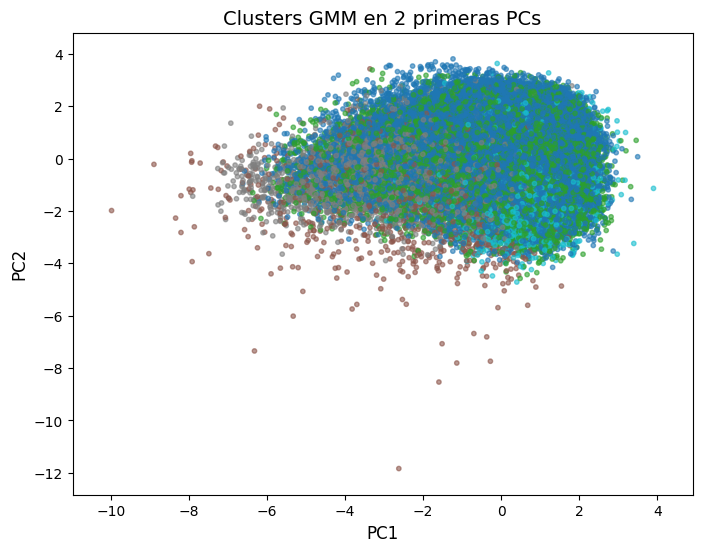

In [33]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 2) Función para dibujar contornos de densidad del GMM
def plot_gmm_contours_2d(gmm, pca, X_pca, resolution=200):
    # límites en espacio PCA
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    
    # grid en PCA
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, resolution),
        np.linspace(y_min, y_max, resolution)
    )
    grid_pca = np.c_[xx.ravel(), yy.ravel()]
    
    # reconvertimos a las 13 dims originales
    grid_orig = pca.inverse_transform(grid_pca)
    
    # score en el espacio original
    Z = -gmm.score_samples(grid_orig)
    Z = Z.reshape(xx.shape)
    
    # dibujamos contornos
    plt.contour(xx, yy, Z, levels=15, norm=LogNorm(), linewidths=1)

# 3) Plot final
plt.figure(figsize=(8,6))
plot_gmm_contours_2d(gm_final, pca, X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1],
            c=labels, s=10, cmap='tab10', alpha=0.6)

plt.title('Clusters GMM en 2 primeras PCs', fontsize=14)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.show()


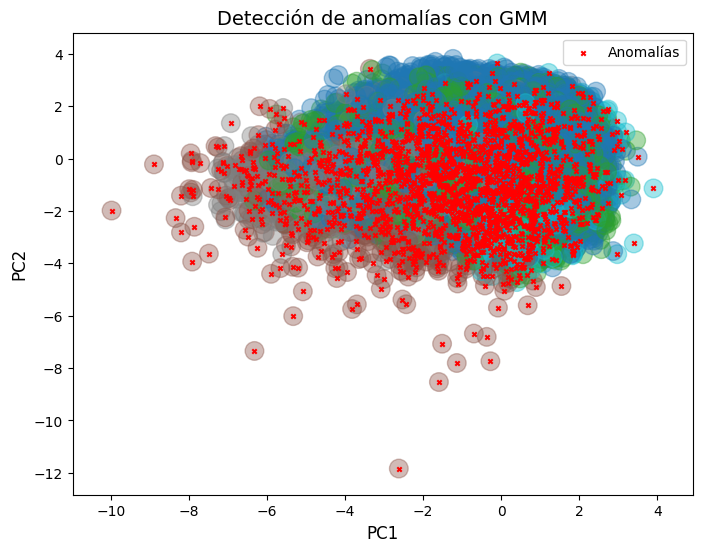

In [34]:


# 1) Cálculo de densidades log-likelihood por muestra
densities = gm_final.score_samples(X_scaled)

# 2) Definir umbral (por ejemplo, el percentil 4%)
threshold = np.percentile(densities, 4)

# 3) Extraer anomalías en el espacio PCA para visualización
anomalies_pca = X_pca[densities < threshold]

# 4) Plot contornos + scatter + anomalías
plt.figure(figsize=(8,6))
plot_gmm_contours_2d(gm_final, pca, X_pca)

# puntos “normales”
plt.scatter(X_pca[:,0], X_pca[:,1],
            c=labels, s=180, cmap='tab10', alpha=0.4)

# anomalías en rojo
plt.scatter(anomalies_pca[:,0], anomalies_pca[:,1],
            c='r', marker='x', s=10, label='Anomalías')

plt.title('Detección de anomalías con GMM', fontsize=14)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend()
plt.show()


In [35]:
# 1) Agregar la etiqueta de cluster al DataFrame original
df['cluster'] = labels

# 2) Ver cuántas muestras hay en cada cluster
print(df['cluster'].value_counts().sort_index())

# 3) Calcular estadísticas medias de tus features por cluster
cluster_summary = df.groupby('cluster')[features].mean()
display(cluster_summary)


cluster
0    28242
1    16384
2     1181
3     2976
4     1900
Name: count, dtype: int64


,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature
cluster,,,,,,,,,,,,,
0,243576.219425,0.504259,0.704631,-7.928332,0.072407,0.195943,0.198911,0.215990,0.459407,123.721354,4.876531,1.000000,4.000000
1,257870.492004,0.515790,0.711452,-7.923082,0.077141,0.182187,0.238477,0.216414,0.441113,123.119584,6.092712,0.000000,4.000000
2,403668.060965,0.359357,0.430797,-13.863986,0.061290,0.461788,0.429572,0.339743,0.264349,119.946861,5.244708,0.585097,3.182896
3,239935.172715,0.385508,0.387034,-12.589169,0.037256,0.534226,0.315513,0.123358,0.261854,122.043653,5.067876,0.644825,3.093414
4,228676.553684,0.394867,0.829474,-6.663486,0.190003,0.096009,0.235203,0.265427,0.346993,128.184705,5.496842,0.595789,3.211053


In [36]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.3f}")


Silhouette Score: 0.094


In [37]:

# 2) Crosstab de conteos
ct = pd.crosstab(df['cluster'], df['genre'])

# 3) Opcional: convertirlo en proporciones por fila
ct_prop = ct.div(ct.sum(axis=1), axis=0)

display(ct_prop)


genre,Blues,Country,Electronic,Folk,Jazz,Latin,Metal,New Age,Pop,Punk,Rap,Reggae,RnB,Rock,World
cluster,,,,,,,,,,,,,,,
0,0.008457,0.036437,0.143614,0.015413,0.030272,0.003952,0.099826,0.008141,0.052166,0.020392,0.033512,0.033117,0.030351,0.479371,0.004979
1,0.007570,0.013178,0.203281,0.012337,0.040236,0.006169,0.122389,0.010094,0.053834,0.015001,0.044722,0.032525,0.035469,0.395766,0.007430
2,0.021442,0.015595,0.267057,0.031189,0.068226,0.001949,0.126706,0.013645,0.027290,0.001949,0.011696,0.011696,0.015595,0.378168,0.007797
3,0.010017,0.030885,0.148581,0.045075,0.061770,0.003339,0.063439,0.045075,0.058431,0.002504,0.016694,0.009182,0.025042,0.464107,0.015860
4,0.005869,0.008216,0.150235,0.002347,0.016432,0.001174,0.280516,0.001174,0.019953,0.016432,0.061033,0.026995,0.024648,0.383803,0.001174
